# 1) Data Import

In [4]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [13]:
train = pd.read_csv('../../data/uncompressed_files/train_users_2.csv')
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


# 2) Data Cleansing

#### Examine column datatypes:

In [29]:
train.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

 #### Cast 'date_account_created', 'date_first_booking' and 'timestamp_first_active' from 'object' to 'datetime'

In [3]:
train['date_account_created'] = pd.to_datetime(train['date_account_created'], format='%Y-%m-%d')
train['date_first_booking'] = pd.to_datetime(train['date_first_booking'], format='%Y-%m-%d')
train['timestamp_first_active'] = pd.to_datetime(train['timestamp_first_active'], format='%Y%m%d%H%M%S')

#### Examine updated column datatyes

In [31]:
train.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                             object
age                               float64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

In [32]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


## Missing data

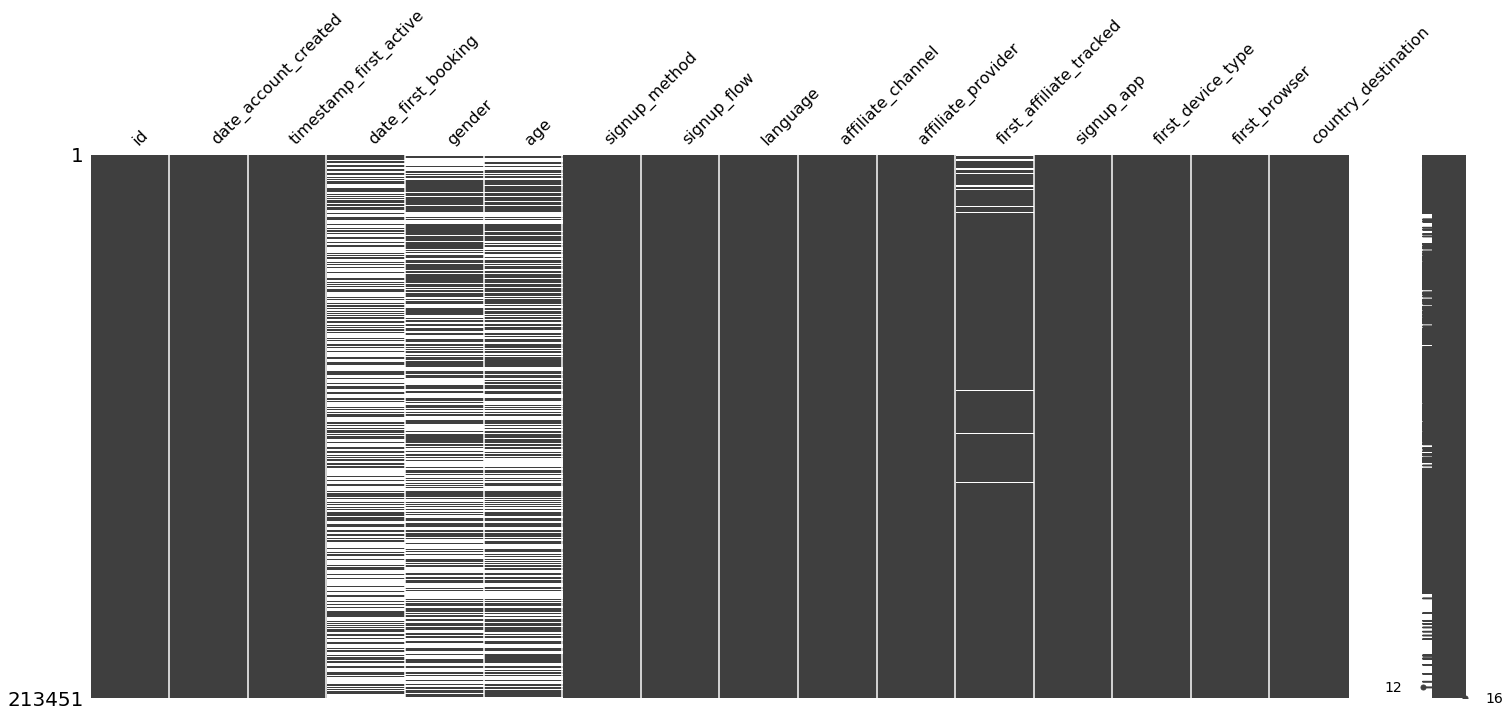

In [48]:
msno.matrix(train)

plot shows a large number of missing values from date_first_booking, gender and age. date_first_booking and age have appropriate missing values

#### Examine missing values in 'gender' column

In [34]:
train.gender.value_counts()/len(train)*100

-unknown-    44.829024
FEMALE       29.534179
MALE         25.504683
OTHER         0.132115
Name: gender, dtype: float64

##### 44% of gender is unknown! Encode gender as 1 - Female , 0 - Male

In [4]:
train.loc[train.gender == 'MALE','gender']=0
train.loc[train.gender == 'FEMALE','gender']=1
train.loc[train.gender == '-unknown-','gender']=np.nan
train.gender.value_counts()/len(train)*100

1        29.534179
0        25.504683
OTHER     0.132115
Name: gender, dtype: float64

#### Examine age 

In [50]:
train.age.describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

There is clearly some incorrect data as age can be as high as 2014. Examine age values > 80

In [54]:
train.loc[train.age>80,'age'].sort_values().unique()

array([  81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,
         90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,
         99.,  100.,  101.,  102.,  103.,  104.,  105.,  106.,  107.,
        108.,  109.,  110.,  111.,  112.,  113.,  115.,  132.,  150.,
       1924., 1925., 1926., 1927., 1928., 1929., 1931., 1932., 1933.,
       1935., 1936., 1938., 1942., 1947., 1949., 1952., 1953., 1995.,
       2008., 2013., 2014.])

Set any age value > 115 to be Nan

In [5]:
train.loc[train.age>115,'age']= np.nan
train.age.describe()

count    124680.000000
mean         37.411870
std          13.952402
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max         115.000000
Name: age, dtype: float64

#### Check if user 'id' is unique

In [6]:
len(train) == len(train['id'].unique())

True

# 3) EDA

#### Destination Countries

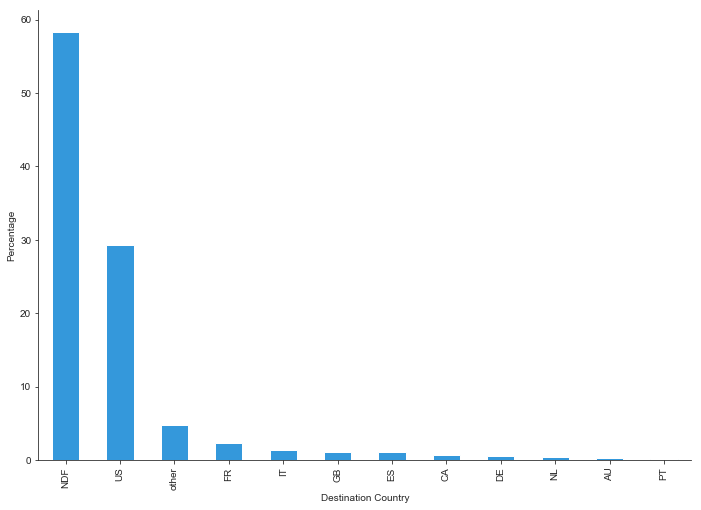

In [8]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
destination_percentage = train.country_destination.value_counts() / train.shape[0] * 100
destination_percentage.plot(kind='bar',color='#3498DB')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

#### Most users did not make any bookings, the highest % of bookings was for domestic trips (bookings in USA)

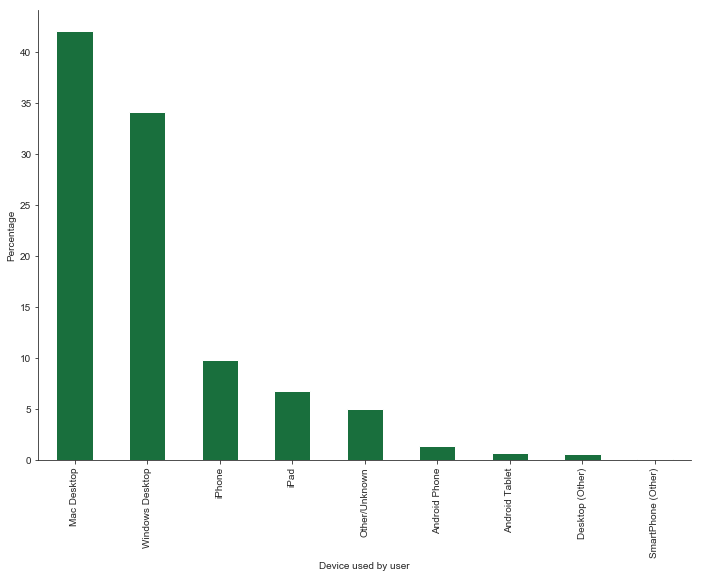

In [9]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
device_percentage = train.first_device_type.value_counts() / train.shape[0] * 100
device_percentage.plot(kind='bar',color='#196F3D')
plt.xlabel('Device used by user')
plt.ylabel('Percentage')
sns.despine()

#### 45% of users were mac desktop users and 35% were windows desktop users. Phone traffic on the website seems pretty low

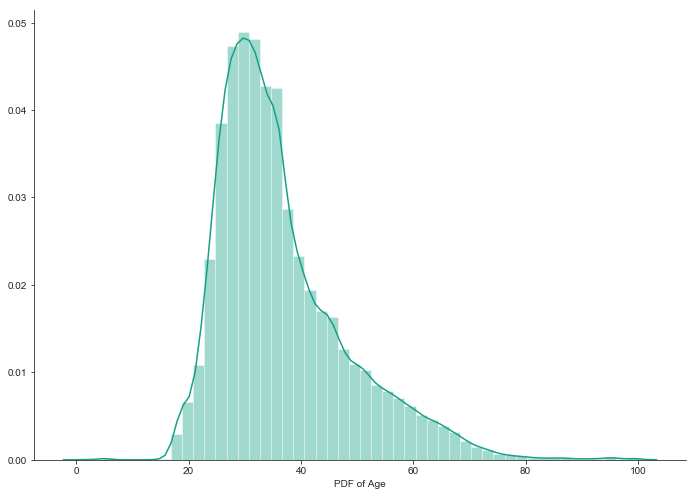

In [11]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
train['age']=train['age'].apply(lambda x : 36 if x>100 else x)
sns.distplot(train.age.dropna(), color='#16A085')
plt.xlabel('PDF of Age')
sns.despine()

Most users are between the ages of 26-40

#### Destination Countries by signup app

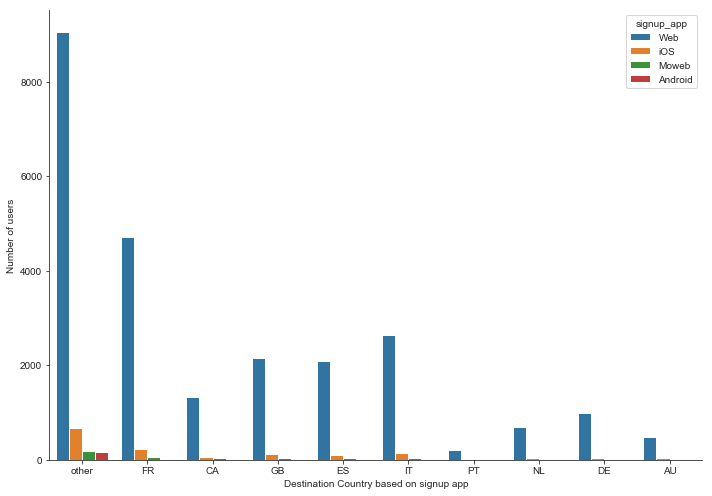

In [24]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = train[train['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
sns.countplot(x='country_destination', hue='signup_app',data=data_without_NDF1)
plt.xlabel('Destination Country based on signup app')
plt.ylabel('Number of users')
sns.despine()

Web signups are clearly dominant across all countries, they are folllowed up iOS, Moweb and Android in that order for all countries

#### Destination countries by signup method

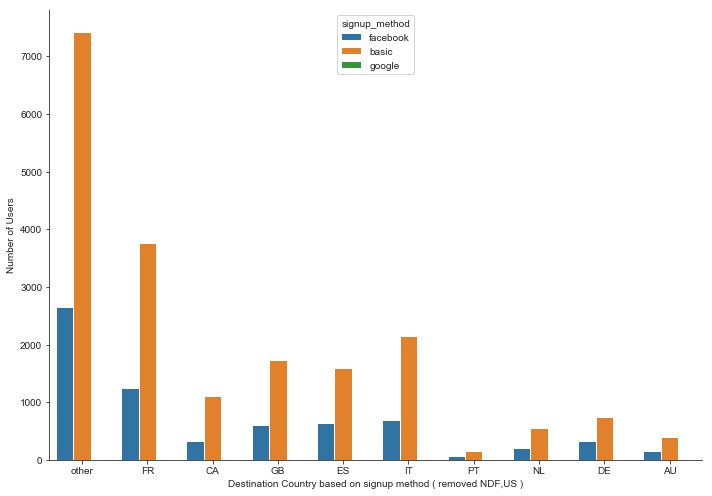

In [25]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = train[train['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
sns.countplot(x='country_destination', hue='signup_method',data=data_without_NDF1)
plt.xlabel('Destination Country based on signup method ( removed NDF,US )')
plt.ylabel('Number of Users')
sns.despine()

Basic signups and facebook are dominant across countries

#### Destination Country by age

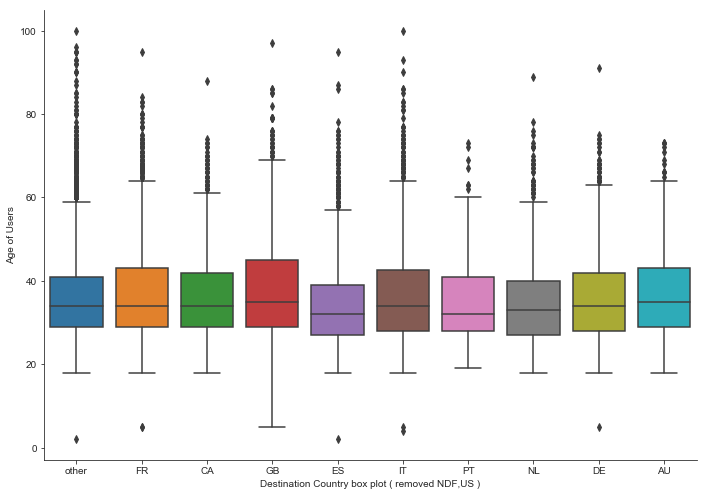

In [26]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = train[train['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
sns.boxplot(y='age' , x='country_destination',data=data_without_NDF1)
plt.xlabel('Destination Country box plot ( removed NDF,US )')
plt.ylabel('Age of Users')
sns.despine()

Users booking for countries Spain , Portugal and Netherlands tend to be younger     where as Users booking for Great Britain tend to be older .